['requested_url', 'plain_text', 'published_date', 'title', 'tags', 'categories', 'author', 'sitename', 'image_url', 'language', 'language_score', 'responded_url', 'publisher', 'warc_path', 'crawl_date']


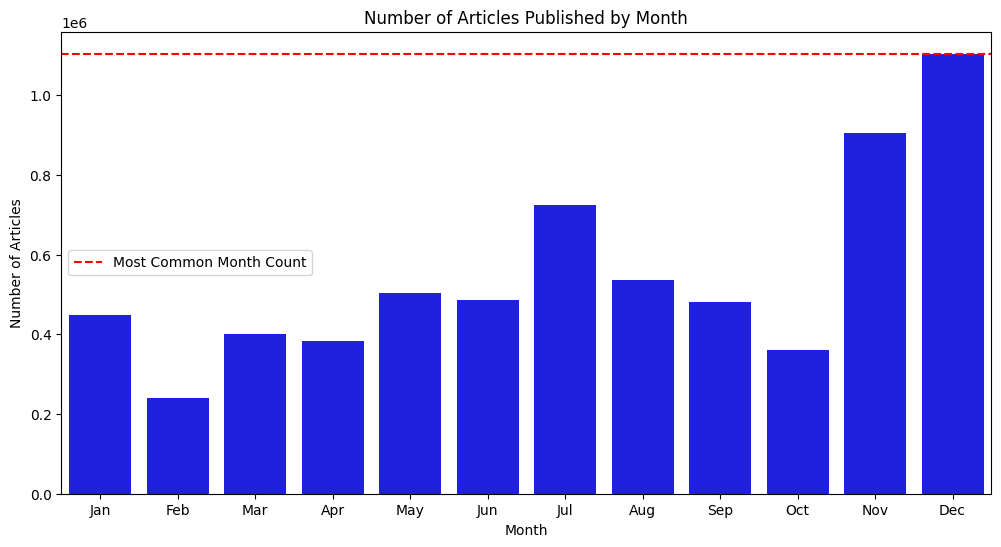

The most common publishing month is: Month 12 with 1103832 articles.


C:\Users\96659\AppData\Local\Temp\ipykernel_6300\34216856.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=months, y=counts, palette='viridis')


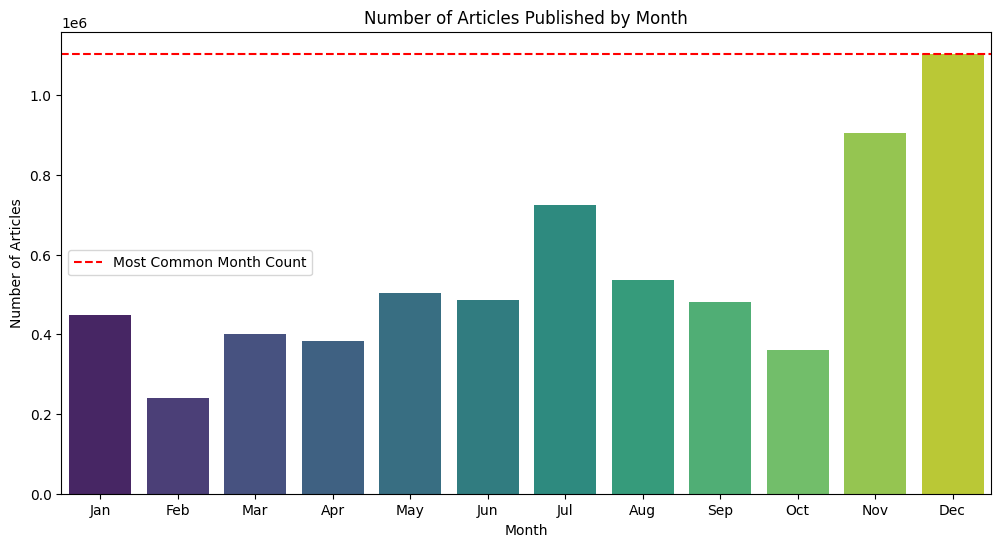

The most common publishing month is: Month 12 with 1103832 articles.


In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, month, count, max

# Create a Spark session
spark = SparkSession.builder \
    .appName("Arabic CCNews Analysis") \
    .getOrCreate()

# Load all three CSV files into separate DataFrames
df1 = spark.read.csv(
    r"C:\Users\96659\Desktop\ccnews\data_gathered\arabic_ccnews_partial.csv",
    header=True,
    inferSchema=True
)

df2 = spark.read.csv(
    r"C:\Users\96659\Desktop\ccnews\data_gathered\arabic_ccnews_partial(2).csv",
    header=True,
    inferSchema=True
)

df3 = spark.read.csv(
    r"C:\Users\96659\Desktop\ccnews\data_gathered\arabic_ccnews_partial3.csv",
    header=True,
    inferSchema=True
)

# Concatenate the three DataFrames
sample_df = df1.union(df2).union(df3)

# Check the DataFrame columns
print(sample_df.columns)

# Assuming the publication date is in the 3rd column
date_column_name = sample_df.columns[2]  # Change this index if necessary

# Convert the publication date column to a date type
sample_df = sample_df.withColumn(date_column_name, col(date_column_name).cast("date"))

# Check for null values in the published date column
null_dates_count = sample_df.filter(col(date_column_name).isNull()).count()
if null_dates_count > 0:
    print(f"Warning: There are {null_dates_count} null values in the published date column.")

# Filter out null published dates
sample_df = sample_df.filter(col(date_column_name).isNotNull())

# Extract the month from the date
sample_df = sample_df.withColumn('month', month(col(date_column_name)))

# Count the occurrences of each month
month_counts = sample_df.groupBy('month').agg(count('*').alias('Count')).orderBy('month')

# Determine the most common month
most_common_month = month_counts.orderBy(col('Count').desc()).first()

# Collect month counts for plotting
month_counts_list = month_counts.collect()

# Prepare data for plotting
months = [row['month'] for row in month_counts_list]
counts = [row['Count'] for row in month_counts_list]

# Plotting the results using matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x=months, y=counts, color='blue')  # Use a single color for the bars
plt.title('Number of Articles Published by Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.axhline(most_common_month['Count'], color='red', linestyle='--', label='Most Common Month Count')
plt.legend()
plt.show()

if most_common_month:
    print(f"The most common publishing month is: Month {most_common_month['month']} with {most_common_month['Count']} articles.")
else:
    print("Could not determine the most common publishing month.")

plt.figure(figsize=(12, 6))
sns.barplot(x=months, y=counts, palette='viridis')
plt.title('Number of Articles Published by Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.axhline(most_common_month['Count'], color='red', linestyle='--', label='Most Common Month Count')
plt.legend()
plt.show()

print(f"The most common publishing month is: Month {most_common_month['month']} with {most_common_month['Count']} articles.")
